In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# Create input object which reads data from MNIST datasets.  Perform one-hot encoding to define the digit
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
# Using Interactive session makes it the default sessions so we do not need to pass sess
sess = tf.InteractiveSession()

In [5]:
# Define placeholders for MNIST input data
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, [None, 10])

# change the MNIST input data from a list of values to a 28 pixel X 28 pixel X 1 grayscale value cube
#    which the Convolution NN can use.
x_image = tf.reshape(x, [-1,28,28,1], name="x_image")

In [6]:
# Define helper functions to created weights and baises variables, and convolution, and pooling layers
#   We are using RELU as our activation function.  These must be initialized to a small positive number 
#   and with some noise so you don't end up going to zero when comparing diffs
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

In [7]:
#   Convolution and Pooling - we do Convolution, and then pooling to control overfitting
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [8]:
# Define layers in the NN

# 1st Convolution layer
# 32 features for each 5X5 patch of the image
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
# Do convolution on images, add bias and push through RELU activation
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
# take results and run through max_pool
h_pool1 = max_pool_2x2(h_conv1)

# 2nd Convolution layer
# Process the 32 features from Convolution layer 1, in 5 X 5 patch.  Return 64 features weights and biases
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
# Do convolution of the output of the 1st convolution layer.  Pool results 
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

In [9]:
# Fully Connected Layer
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

#   Connect output of pooling layer 2 as input to full connected layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# dropout some neurons to reduce overfitting
keep_prob = tf.placeholder(tf.float32)  # get dropout probability as a training input.
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

In [10]:
# Readout layer
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

# Define model
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [11]:
# Loss measurement
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels=y_))

# loss optimization
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

# What is correct
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
# How accurate is it?
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [12]:
# Initialize all of the variables
sess.run(tf.global_variables_initializer())

In [13]:
# Train the model
import time

#  define number of steps and how often we display progress
num_steps = 3000
display_every = 100

# Start timer
start_time = time.time()
end_time = time.time()

for i in range(num_steps):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

    # Periodic status display
    if i%display_every == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        end_time = time.time()
        print("step {0}, elapsed time {1:.2f} seconds, training accuracy {2:.3f}%".format(i, end_time-start_time, train_accuracy*100.0))


# Display summary 
#     Time to train
end_time = time.time()
print("Total training time for {0} batches: {1:.2f} seconds".format(i+1, end_time-start_time))

step 0, elapsed time 0.28 seconds, training accuracy 14.000%
step 100, elapsed time 9.62 seconds, training accuracy 74.000%
step 200, elapsed time 19.11 seconds, training accuracy 94.000%
step 300, elapsed time 28.59 seconds, training accuracy 98.000%
step 400, elapsed time 38.29 seconds, training accuracy 94.000%
step 500, elapsed time 48.01 seconds, training accuracy 92.000%
step 600, elapsed time 57.41 seconds, training accuracy 100.000%
step 700, elapsed time 67.05 seconds, training accuracy 90.000%
step 800, elapsed time 76.68 seconds, training accuracy 98.000%
step 900, elapsed time 86.41 seconds, training accuracy 96.000%
step 1000, elapsed time 95.79 seconds, training accuracy 92.000%
step 1100, elapsed time 105.33 seconds, training accuracy 96.000%
step 1200, elapsed time 114.66 seconds, training accuracy 94.000%
step 1300, elapsed time 124.13 seconds, training accuracy 96.000%
step 1400, elapsed time 133.65 seconds, training accuracy 100.000%
step 1500, elapsed time 143.21 se

In [14]:
#     Accuracy on test data
print("Test accuracy {0:.3f}%".format(accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})*100.0))

Test accuracy 98.310%


In [25]:
import numpy as np 
import matplotlib as mp
%matplotlib inline
import matplotlib.pyplot as plt
import math

In [16]:
def getActivations(layer,stimuli):
    units = sess.run(layer,feed_dict={x:np.reshape(stimuli,[1,784],order='F'),keep_prob:1.0})
    plotNNFilter(units)

In [17]:
def plotNNFilter(units):
    filters = units.shape[3]
    plt.figure(1, figsize=(20,20))
    n_columns = 6
    n_rows = math.ceil(filters / n_columns) + 1
    for i in range(filters):
        plt.subplot(n_rows, n_columns, i+1)
        plt.title('Filter ' + str(i))
        plt.imshow(units[0,:,:,i], interpolation="nearest", cmap="gray")

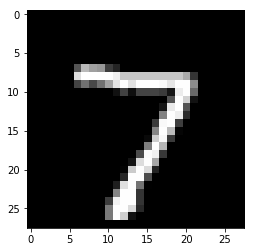

In [22]:
imageToUse = mnist.test.images[0]
plt.imshow(np.reshape(imageToUse,[28,28]), interpolation="nearest", cmap="gray")

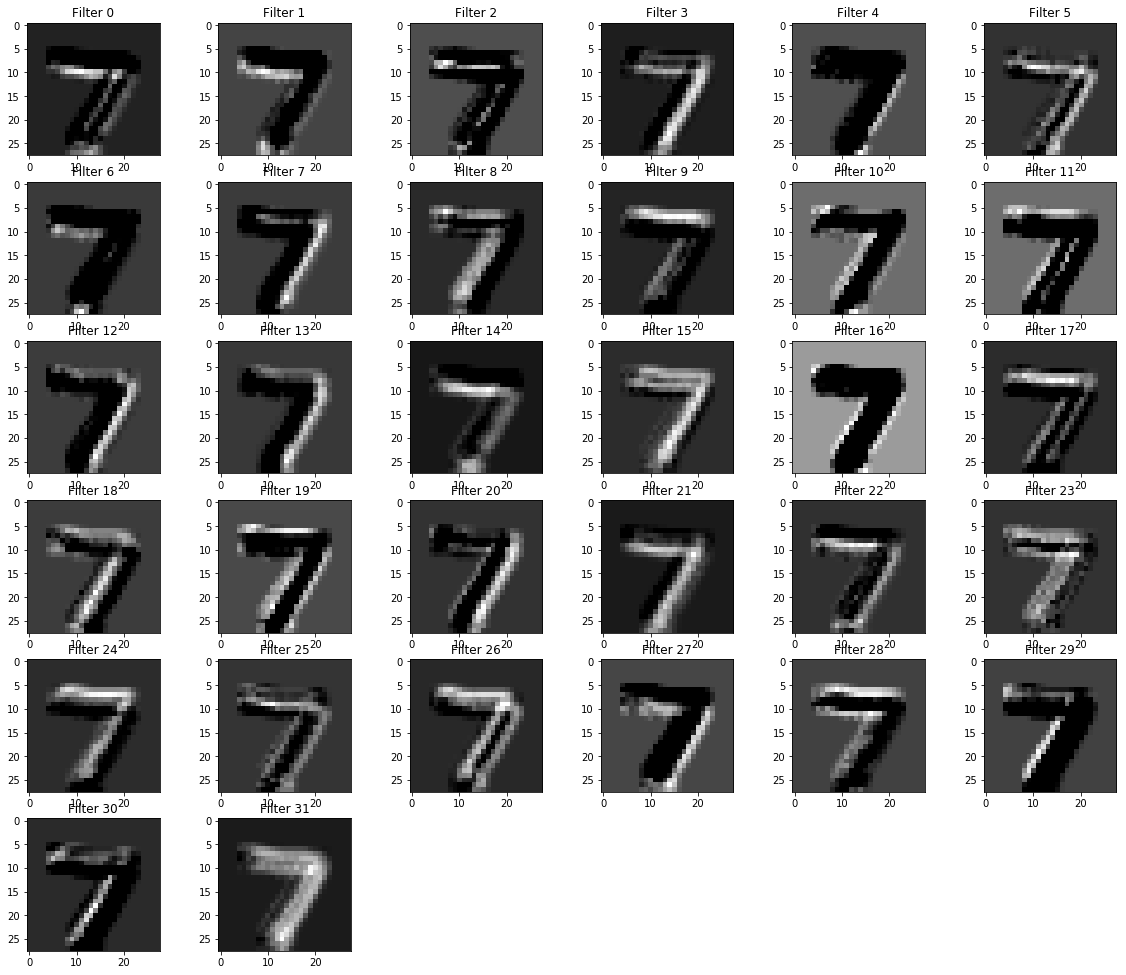

In [26]:
getActivations(h_conv1,imageToUse)

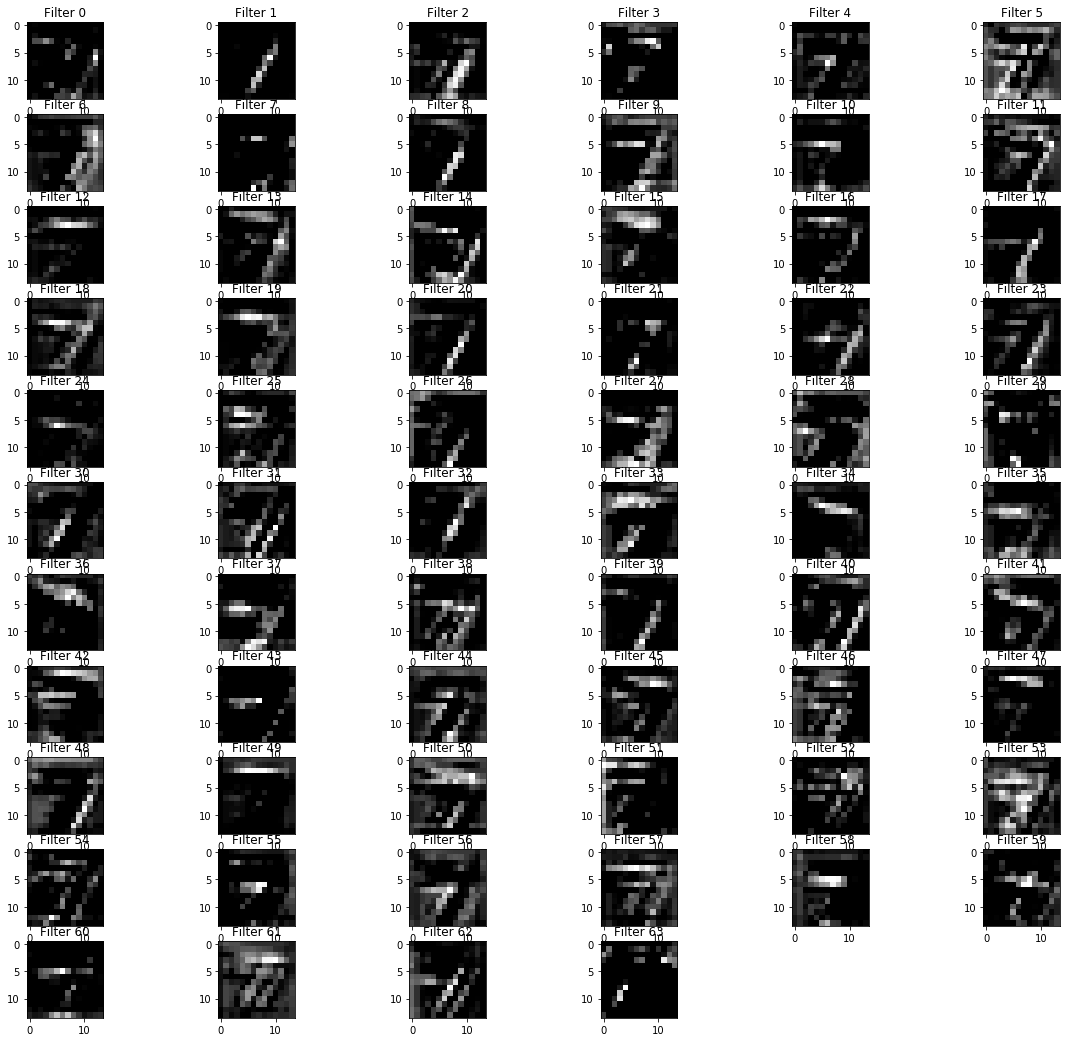

In [29]:
getActivations(h_conv2,imageToUse)

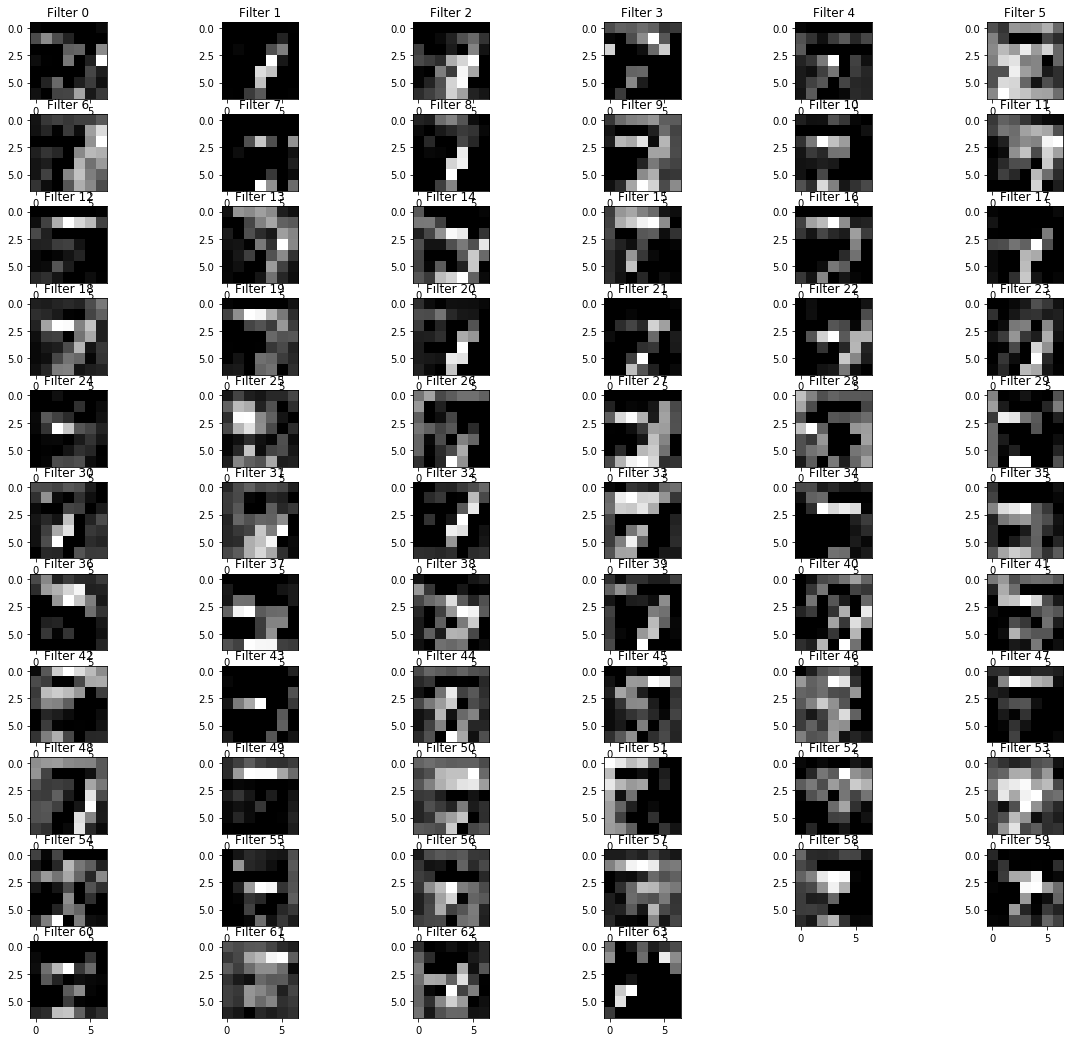

In [32]:
getActivations(h_pool2,imageToUse)

In [14]:
sess.close()